In [1]:
def threshold(values):
    label=[]
    for i in (values):
        if i<25:
            label.append('u')
        elif i>75:
             label.append('o')
        else:
             label.append('n')
    return label

In [2]:
import pandas as pd
import statsmodels as sm
import matplotlib.pyplot as plt
import datetime
from matplotlib import pyplot
series = pd.read_csv('h1.csv', header=0,usecols=[0,4])
series["Timestamp"]=pd.to_datetime(series["Timestamp"],unit='s')
series.columns=['Time','use']
series.dropna()
series.set_index('Time',inplace=True)
series.head()

,use
Time,
2013-08-12 13:40:46,93.233333
2013-08-12 13:45:46,93.050000
2013-08-12 13:50:46,89.150000
2013-08-12 13:55:46,90.050000
2013-08-12 14:00:46,93.566667


<AxesSubplot:xlabel='Time'>

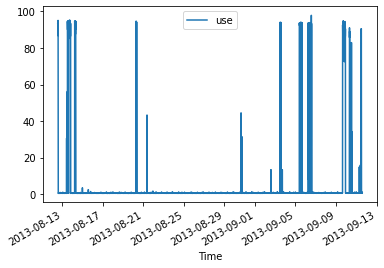

In [3]:
series.plot()

In [4]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(series['use'])
print(result)
series['shift5']=series['use']-series['use'].shift(1)
result2=adfuller(series['shift5'].dropna())
print(result2)

(-8.709267387996384, 3.628339568708499e-14, 37, 8596, {'1%': -3.4311109648492004, '5%': -2.8618762951485057, '10%': -2.5669490049767214}, 53270.20404919418)
(-20.538066288124636, 0.0, 37, 8595, {'1%': -3.4311110534114224, '5%': -2.861876334282023, '10%': -2.566949025807786}, 53333.191219364206)


<AxesSubplot:xlabel='Time'>

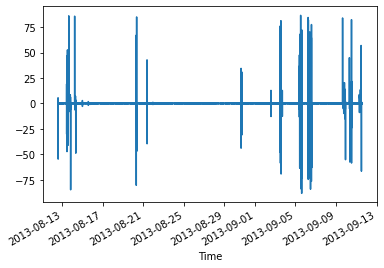

In [5]:
series['shift5'].plot()

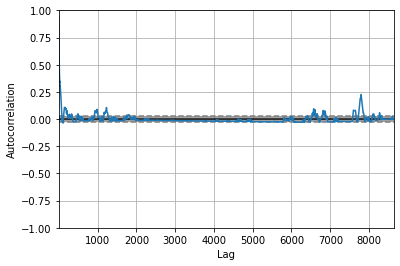

In [6]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series['use'])
plt.show()

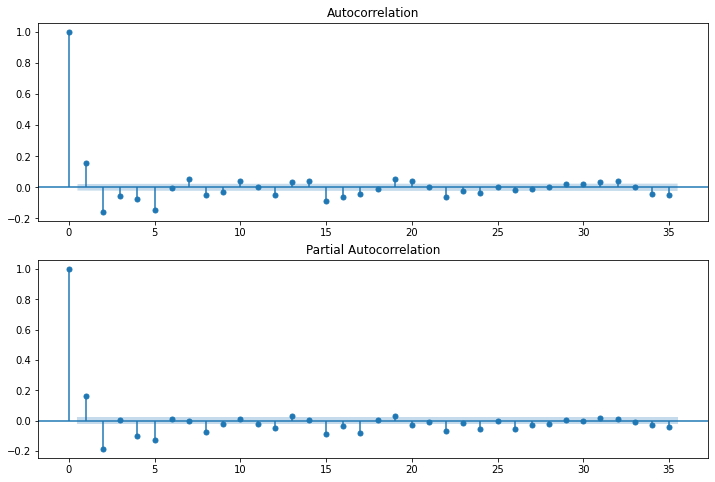

In [7]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)
fig1=sm.graphics.tsaplots.plot_acf(series['shift5'].dropna(),lags=35,ax=ax1)
fig1=sm.graphics.tsaplots.plot_pacf(series['shift5'].dropna(),lags=35,ax=ax2)

In [8]:
from statsmodels.tsa.arima_model import ARIMA

In [9]:
model=ARIMA(series['use'],order=(2,0,2))
model_fit=model.fit()

c:\users\mohammed mudassir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\mohammed mudassir\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583

In [10]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    use   No. Observations:                 8634
Model:                     ARMA(2, 2)   Log Likelihood              -26976.273
Method:                       css-mle   S.D. of innovations              5.503
Date:                Wed, 27 Jan 2021   AIC                          53964.547
Time:                        11:41:22   BIC                          54006.928
Sample:                             0   HQIC                         53978.998
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2497      1.237      3.436      0.001       1.825       6.674
ar.L1.use      1.5763      0.054     29.231      0.000       1.471       1.682
ar.L2.use     -0.5910      0.051    -11.686      0.000      -0.690      -0.492
ma.L1.use     -0.4163      0.053     -7.887      0.000      -0.520      -0.313
ma.L2.use     -0.2760      0.013    -20.743      0.000      -0.302      -0.250
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0396           +0.0000j            1.0396            0.0000
AR.2            1.6276           +0.0000j            1.6276            0.0000
MA.1            1.2933           +0.0000j            1.2933            0.0000
MA.2           -2.8017           +0.0000j            2.8017            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Time'>

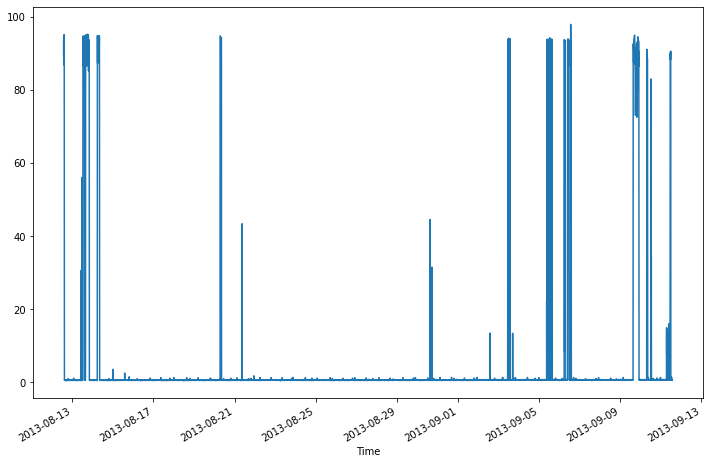

In [11]:
series['use'].plot(figsize=(12,8))

<AxesSubplot:xlabel='Time'>

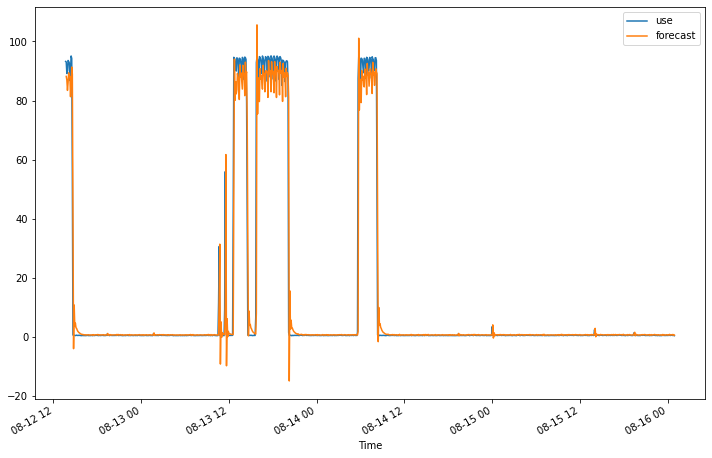

In [22]:
series['forecast']=model_fit.predict(start=1,end=8633)
series[['use','forecast']][:1000].plot(figsize=(12,8))

In [13]:
series.head()

,use,shift5,forecast
Time,,,
2013-08-12 13:40:46,93.233333,NaN,NaN
2013-08-12 13:45:46,93.050000,-0.183333,88.176706
2013-08-12 13:50:46,89.150000,-3.900000,86.951388
2013-08-12 13:55:46,90.050000,0.900000,83.441125
2013-08-12 14:00:46,93.566667,3.516667,86.001890


In [14]:
forecast_errors = [series['forecast'][i]-series['use'][i] for i in range(1,len(series['use']))]

In [15]:
mean_forecast_error = sum(forecast_errors) * 1.0/len(forecast_errors)
print('MEAN : ',mean_forecast_error)

MEAN :  0.0226524716956115


In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
mae = mean_absolute_error(series['use'][1::],series['forecast'].dropna()) 
print('MAE: %f' % mae)
mse = mean_squared_error(series['use'][1::],series['forecast'].dropna()) 
print('MSE: %f' % mse)
rmse = (mse)**(1/2)
print('RMSE: %f' % rmse)

MAE: 0.967812
MSE: 30.195742
RMSE: 5.495065


In [17]:
from sklearn.metrics import confusion_matrix
import numpy as np
testLabels=threshold(series['use'])
predLabels=threshold(series['forecast'])
conf_mat = confusion_matrix(testLabels,predLabels)
acc = np.sum(conf_mat.diagonal()) / np.sum(conf_mat)
print('Overall accuracy: {} %'.format(acc*100))

Overall accuracy: 98.95760945100764 %
